In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [114]:
df=pd.read_csv('heartdisease.csv',names=range(0,14))

In [115]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [116]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [117]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [118]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [119]:
df['slope']=df['slope'].replace('?',0)
df['ca']=df['ca'].replace('?',0)
df['thal']=df['thal'].replace('?',0)

In [120]:
df['thal']=df['thal'].astype(float)
df['ca']=df['ca'].astype(float)

In [121]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [122]:
#Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [123]:
# outliers can be present in 'chol', 'trestbps','thalach'

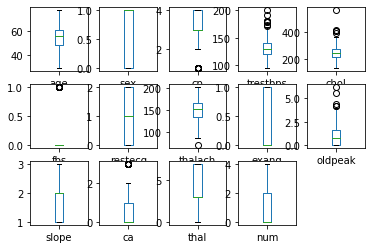

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [124]:
df.plot(kind='box',subplots=True,layout=(3,5))
plt.show()
plt.figure(figsize=(15,10))

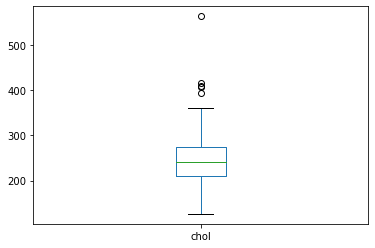

In [125]:
df['chol'].plot.box()

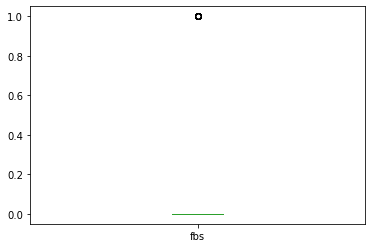

In [126]:
df['fbs'].plot.box()

In [127]:
#removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.94872647, 0.68620244, 2.25177456, ..., 0.71113139, 0.65913253,
        0.76419779],
       [1.39200191, 0.68620244, 0.87798549, ..., 2.5048807 , 0.86542592,
        0.86644961],
       [1.39200191, 0.68620244, 0.87798549, ..., 1.43287667, 1.16731868,
        0.05112591],
       ...,
       [0.28381332, 0.68620244, 0.87798549, ..., 0.36087264, 1.16731868,
        1.68177331],
       [0.28381332, 1.4572959 , 1.20852121, ..., 0.36087264, 0.86542592,
        0.05112591],
       [1.82174501, 0.68620244, 0.16526786, ..., 0.71113139, 0.86542592,
        0.76419779]])

In [128]:
threshold=3
print(np.where(z>3))

(array([ 48,  91, 121, 123, 126, 152, 181, 188, 245], dtype=int64), array([4, 9, 4, 9, 3, 4, 4, 3, 7], dtype=int64))


In [129]:
z[48][4]

3.2946855640924104

In [130]:
z[245][7]

3.442067163296131

In [131]:
#removing outliers
df_new=df[(z<3).all(axis=1)]

In [132]:
df.shape

(303, 14)

In [133]:
df_new.shape

(294, 14)

In [134]:
df_new.skew()

age        -0.179588
sex        -0.828274
cp         -0.824993
trestbps    0.524793
chol        0.260405
fbs         2.012412
restecg     0.054718
thalach    -0.480275
exang       0.743629
oldpeak     1.012591
slope       0.506177
ca          1.246304
thal        0.227140
num         1.113818
dtype: float64

In [135]:
# removing skewness

df_new['fbs']=np.log1p(df_new['fbs'])
df_new['oldpeak']=np.log1p(df_new['oldpeak'])
df_new['ca']=np.log1p(df_new['ca'])


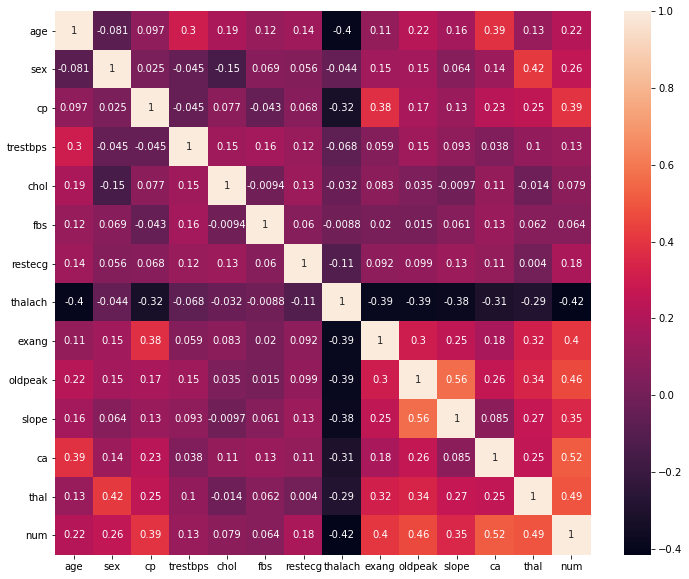

In [136]:
# checking the correlation
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr(),annot=True)

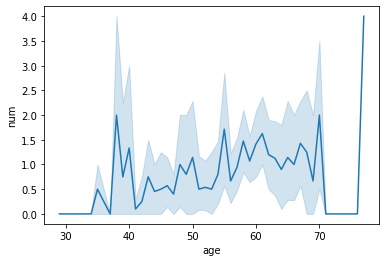

In [137]:
sns.lineplot(df_new['age'],df_new['num'])

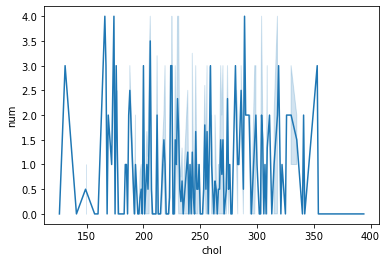

In [138]:
sns.lineplot(df_new['chol'],df_new['num'])

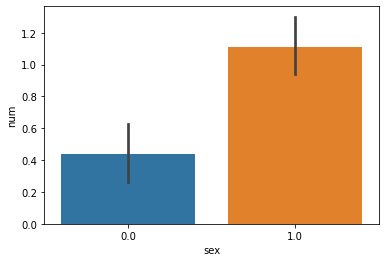

In [139]:
sns.barplot(x=df_new['sex'],y=df_new['num'],data=df_new)
plt.show()

In [140]:
# split into data and target

x=df_new.iloc[:,:-1]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,0.693147,2.0,150.0,0.0,1.193922,3.0,0.000000,6.0
1,67.0,1.0,4.0,160.0,286.0,0.000000,2.0,108.0,1.0,0.916291,2.0,1.386294,3.0
2,67.0,1.0,4.0,120.0,229.0,0.000000,2.0,129.0,1.0,1.280934,2.0,1.098612,7.0
3,37.0,1.0,3.0,130.0,250.0,0.000000,0.0,187.0,0.0,1.504077,3.0,0.000000,3.0
4,41.0,0.0,2.0,130.0,204.0,0.000000,2.0,172.0,0.0,0.875469,1.0,0.000000,3.0


In [141]:
y=pd.DataFrame(df_new['num'])
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.20)

In [143]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=43)
forest.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=43)

In [147]:
forest.score(x_train,y_train)

0.9829787234042553

In [148]:
predf=forest.predict(x_test)

In [149]:
accuracy_score(y_test,predf)

0.6271186440677966

In [150]:
confusion_matrix(y_test,predf)

array([[32,  1,  1,  1,  0],
       [ 6,  1,  2,  0,  0],
       [ 1,  3,  1,  0,  0],
       [ 0,  2,  1,  3,  0],
       [ 0,  3,  1,  0,  0]], dtype=int64)

In [144]:
model=[MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [145]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score:',accuracy_score(y_test,predm))
    print('confusion_matrix:',confusion_matrix(y_test,predm))
    print('classification_report:',classification_report(y_test,predm))

accuracy_score: 0.4915254237288136
confusion_matrix: [[25  5  1  2  2]
 [ 5  3  0  0  1]
 [ 0  1  0  4  0]
 [ 0  2  0  1  3]
 [ 1  2  0  1  0]]
classification_report:               precision    recall  f1-score   support

           0       0.81      0.71      0.76        35
           1       0.23      0.33      0.27         9
           2       0.00      0.00      0.00         5
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         4

    accuracy                           0.49        59
   macro avg       0.23      0.24      0.23        59
weighted avg       0.53      0.49      0.51        59

accuracy_score: 0.5932203389830508
confusion_matrix: [[35  0  0  0  0]
 [ 9  0  0  0  0]
 [ 5  0  0  0  0]
 [ 6  0  0  0  0]
 [ 4  0  0  0  0]]
classification_report:               precision    recall  f1-score   support

           0       0.59      1.00      0.74        35
           1       0.00      0.00      0.00         9
           2  

In [152]:
import joblib
joblib.dump(forest,'heartdisease.pkl')

['heartdisease.pkl']